In [7]:
import sklearn.datasets
import numpy as np
from sklearn.model_selection import train_test_split

N = 300
noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
def plot_decision_boundary(model, X, y):    
    assert (X.shape == (2, X.shape[1]) ) , "Shape is incorrect:" + str(X.shape)
    assert (y.shape == (1, y.shape[1]) ) , "Shape is incorrect:" + str(y.shape)

    import matplotlib.pyplot as plt 
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    
    # can hardcode reshaping because there is assert control
    Z = np.array([model.predict(np.array(x).reshape(2,1)) for x in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [28]:
X_moons_all = np.array(noisy_moons[0])
Y_moons_all = np.array(noisy_moons[1])

X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons_all, Y_moons_all, test_size=0.10, random_state=42)

X_train_moons = X_train_moons.reshape(-1 , X_train_moons.shape[1]).T
X_test_moons = X_test_moons.reshape(-1, X_test_moons.shape[1]).T
y_train_moons = np.array(y_train_moons).reshape(1,-1)
y_test_moons = np.array(y_test_moons).reshape(1,-1)

print (X_train_moons.shape)
print (X_test_moons.shape)
print (y_train_moons.shape)
print (y_test_moons.shape)

(2, 270)
(2, 30)
(1, 270)
(1, 30)


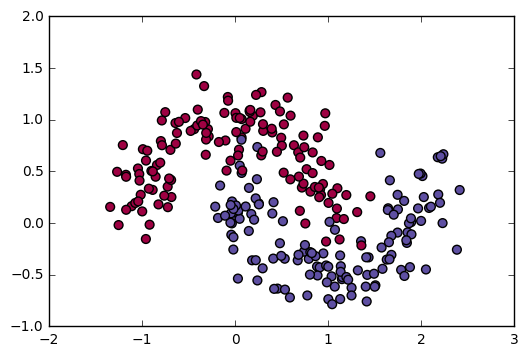

In [37]:
# Visualize the data:
plt.scatter(X_train_moons[0, :], X_train_moons[1, :], c=y_train_moons, s=40, cmap=plt.cm.Spectral);

In [54]:
def sigmoid(z):
        return 1.0 / (1 + np.exp(-z))

def sigmoid_derivate(z):
    return sigmoid(z) * (1 - sigmoid(z))

class TwoLayerNN:
    def __init__(self, num_perceptron_first_layer = 4):
        self.num_perceptron_first_layer = num_perceptron_first_layer 
    
    def train(self, X, y, num_iteration=100, learning_rate=0.1):
        examples = X.shape[0]

        #inicialization of first layer
        W1 = np.random.randn(self.num_perceptron_first_layer, examples)
        b1 = np.random.randn(self.num_perceptron_first_layer, 1)

        W2 = np.random.randn(1, self.num_perceptron_first_layer)
        b2 = np.random.randn(1, 1)

        costs = []
        
        for _ in range(num_iteration):
            # predicting
            z1 = np.dot(W1, X) + b1
            a1 = np.tanh(z1)
            z2 = np.dot(W2, a1) + b2
            a2 = sigmoid(z2)

            #logging
            logprobs = np.multiply(np.log(a2), y) + np.multiply(np.log(1 - a2), 1 - y)
            cost = - 1.0/examples * np.sum(logprobs)
            costs.append(cost)
              
            #backpropagation
            dZ2= a2 - y # because there is a sigmoid at the end - see https://petrlorenc.github.io/Logistic-Regression/
            dW2 = 1.0/examples * np.dot( dZ2 , a1.T)
            db2 = 1.0/examples * np.sum( dZ2, axis=1, keepdims=True )
            dZ1 = np.dot ( W2.T , dZ2 ) * ( 1 - np.power(a1, 2) ) 
            dW1 = 1.0/examples * np.dot( dZ1 , X.T)
            db1 = 1.0/examples * np.sum( dZ1, axis=1, keepdims=True )
            
            #update weight
            W1 = W1 - learning_rate * dW1
            b1 = b1 - learning_rate * db1
            W2 = W2 - learning_rate * dW2
            b2 = b2 - learning_rate * db2

        # saving
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2
        return {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2, "costs" : costs}
    
    def predict(self, example):

        z1 = np.dot(self.W1, example) + self.b1
        a1 = np.tanh(z1)
        z2 = np.dot(self.W2, a1) + self.b2
        a2 = sigmoid(z2)
        
        return 0 if a2 <= 0.5 else 1

In [74]:
nn = TwoLayerNN()
param = nn.train(np.array(X_train_moons) ,np.array(y_train_moons), num_iteration=1000)

(2, 270)


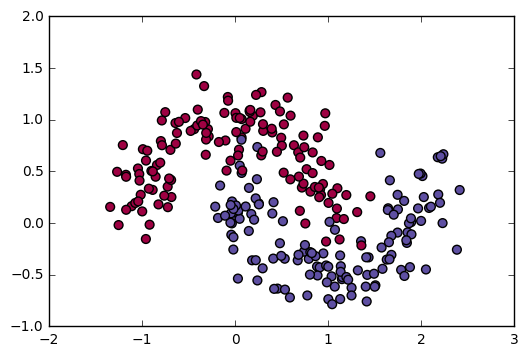

In [75]:
plt.scatter(X_train_moons[0, :], X_train_moons[1, :], c=y_train_moons, s=40, cmap=plt.cm.Spectral);

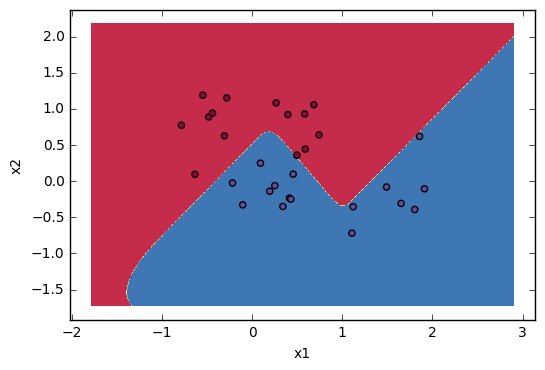

In [76]:
plot_decision_boundary(nn, X_test_moons, y_test_moons)

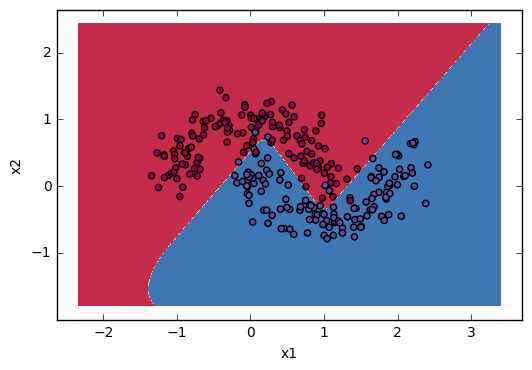

In [77]:
plot_decision_boundary(nn, X_train_moons, y_train_moons)

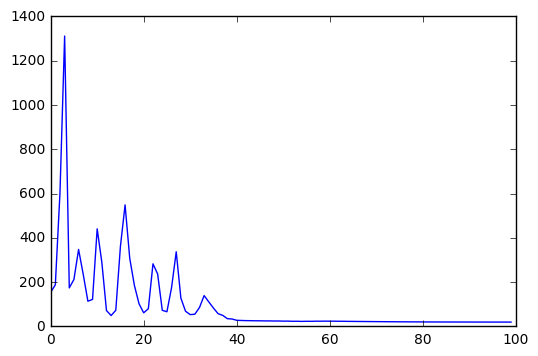

In [80]:
plt.plot(param["costs"][:100])

In [42]:
N = 400
noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    
X_circles_all = np.array(noisy_circles[0])
Y_circles_all = np.array(noisy_circles[1])

X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles_all, Y_circles_all, test_size=0.33, random_state=42)

X_train_circles = X_train_circles.reshape(-1 , X_train_circles.shape[1]).T
X_test_circles = X_test_circles.reshape(-1, X_test_circles.shape[1]).T
y_train_circles = np.array(y_train_circles).reshape(1,-1)
y_test_circles = np.array(y_test_circles).reshape(1,-1)

print (X_train_circles.shape)
print (X_test_circles.shape)
print (y_train_circles.shape)
print (y_test_circles.shape)

nn = TwoLayerNN()
param = nn.train(np.array(X_train_circles) ,np.array(y_train_circles), num_iteration=10000)

(2, 268)
(2, 132)
(1, 268)
(1, 132)
(2, 268)


{'W1': array([[ 11.92298859,  17.57047446],
        [-45.79133753,   6.41725957],
        [-17.17855864, -46.03052223],
        [-19.17584455,  18.96613875]]),
 'W2': array([[ 0.89126466, -3.90434252,  4.43843536,  3.80250832]]),
 'b1': array([[  3.76644964],
        [-22.79819228],
        [ 25.70235625],
        [ 12.77751359]]),
 'b2': array([[-2.82991541]])}

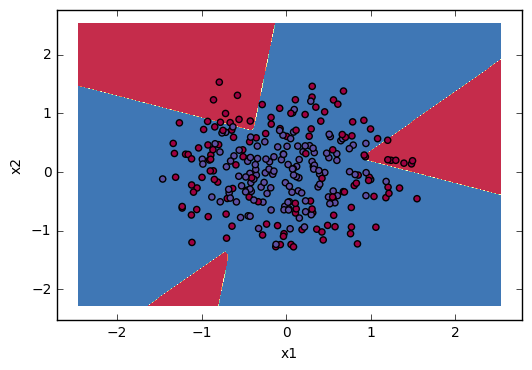

In [43]:
plot_decision_boundary(nn, X_train_circles, y_train_circles)

(2, 268)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in multiply


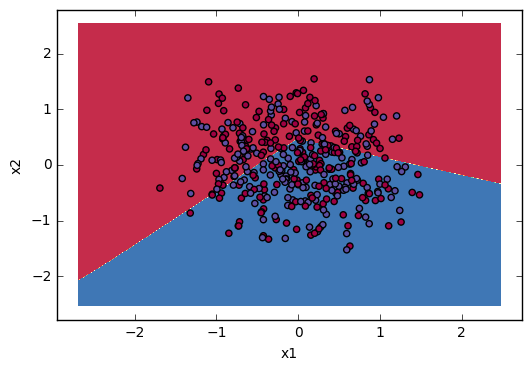

In [72]:
nn = TwoLayerNN(6)
nn.train(np.array(X_train_circles) ,np.array(y_train_circles), num_iteration=1000)
plot_decision_boundary(nn, X_circles_all.reshape(2, -1) , Y_circles_all.reshape(1,-1))

(2, 268)


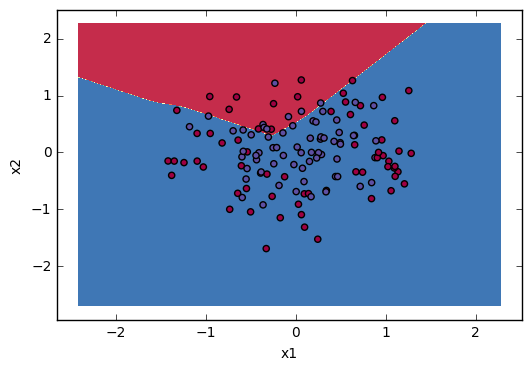

In [68]:
nn = TwoLayerNN(8)
nn.train(np.array(X_train_circles) ,np.array(y_train_circles), num_iteration=10000)
plot_decision_boundary(nn, X_test_circles, y_test_circles)